<a href="https://colab.research.google.com/github/VictoriaReiShiro/Math_Models_In_Python/blob/master/%D0%9A%D0%BB%D0%B5%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание №1**

step 1 of 100
step 2 of 100
step 3 of 100
step 4 of 100
step 5 of 100
step 6 of 100
step 7 of 100
step 8 of 100
step 9 of 100
step 10 of 100
step 11 of 100
step 12 of 100
step 13 of 100
step 14 of 100
step 15 of 100
step 16 of 100
step 17 of 100
step 18 of 100
step 19 of 100
step 20 of 100
step 21 of 100
step 22 of 100
step 23 of 100
step 24 of 100
step 25 of 100
step 26 of 100
step 27 of 100
step 28 of 100
step 29 of 100
step 30 of 100
step 31 of 100
step 32 of 100
step 33 of 100
step 34 of 100
step 35 of 100
step 36 of 100
step 37 of 100
step 38 of 100
step 39 of 100
step 40 of 100
step 41 of 100
step 42 of 100
step 43 of 100
step 44 of 100
step 45 of 100
step 46 of 100
step 47 of 100
step 48 of 100
step 49 of 100
step 50 of 100
step 51 of 100
step 52 of 100
step 53 of 100
step 54 of 100
step 55 of 100
step 56 of 100
step 57 of 100
step 58 of 100
step 59 of 100
step 60 of 100
step 61 of 100
step 62 of 100
step 63 of 100
step 64 of 100
step 65 of 100
step 66 of 100
step 67 of 100
step

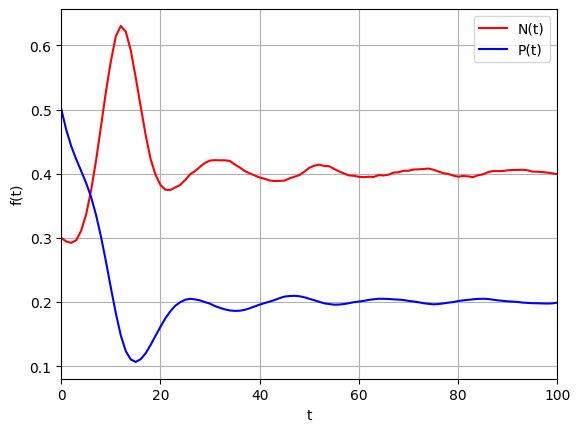

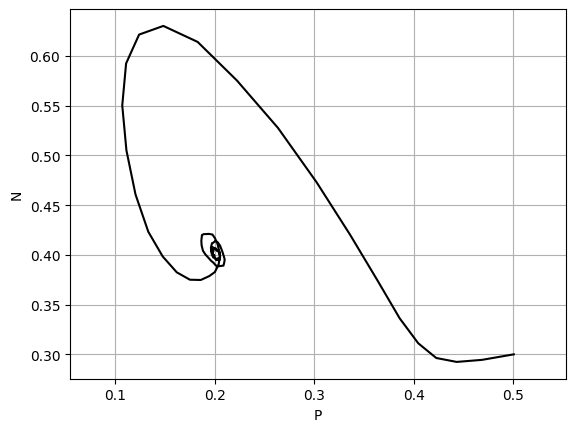

0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция раскидывания организмов по клеткам
def RandN(Nn, N):
    M = len(N)
    while Nn >= 0:
        i = np.random.randint(M)
        j = np.random.randint(M)
        if N[i, j] == 0:
            N[i, j] = 1
            Nn = Nn - 1
    return N

# Функция случайного определения свободной клетки
def GetClearCell(i, j, N):
    M = len(N)
    iN = i
    jN = j
    if i > 0 and j > 0 and i < M - 1 and j < M - 1:
        k = 9 - np.sum(np.sum(N[i - 1 : i + 2, j - 1 : j + 2]))
        if k != 0:
            while 1:
                iN = np.random.randint(i - 1, i + 2)
                jN = np.random.randint(j - 1, j + 2)
                if N[iN, jN] == 0:
                    break
    return [iN, jN]

# Основная функция
def main():

    # Параметры модели
    M = 256  # размер поля
    pMax = 10  # максимальное значение питательности раствора
    rp = 1  # скорость роста питательности
    L = 15  # время жизни в тактах
    L3 = 3  # возраст зрелости организма
    dpN = 5  # уровень поедаемой клеткой энергии
    pN = 35  # максимальное количество энергии организма
    deN = 2  # затраты энергии организмом
    drN = 3  # затраты энергии при делении
    No = 30  # начальное число особей в %

    # Вычисление количества организмов
    n = int(M * M * No / 100)

    # Создание поля энергии
    P = rp * np.random.randint(0, int(pMax / float(rp)) + 1, size=(M, M))

    # Создание поля организмов
    N = RandN(n, np.zeros([M, M]))

    # Содание поля энергии организмов
    PN = dpN * N

    # Создание поля возраста организмов
    LN = np.zeros([M, M])

    # Количество тактов
    nt = 101
    # Массивы численности одноклеточных и степени питательности раствора
    Nt = np.zeros(nt)
    Pt = np.zeros(nt)

    # Начальные значения
    Nt[0] = n / float(M * M)
    Pt[0] = np.sum(np.sum(P)) / float(M * M * pMax)

    # Массив времени (тактов)
    t = np.linspace(0, nt - 1, nt)

    # Моделирование клеточного автомата
    for k in range(1, nt):
        for i in range(M):
            for j in range(M):

                # Прирост питательности клетки
                if P[i, j] < pMax:
                    P[i, j] = P[i, j] + rp
                    if P[i, j] > pMax:
                        P[i, j] = pMax
        for i in range(M):
            for j in range(M):
                if N[i, j] == 1:

                    # Питание организма
                    if PN[i, j] < pN and P[i, j] != 0:
                        if P[i, j] - dpN >= 0:
                            PN[i, j] = PN[i, j] + dpN
                            P[i, j] = P[i, j] - dpN
                        else:
                            PN[i, j] = PN[i, j] + P[i, j]
                            P[i, j] = 0

                    # Затраты организма
                    if PN[i, j] - deN >= 0:
                        PN[i, j] = PN[i, j] - deN
                    else:
                        PN[i, j] = 0

                    # Старение и смерть организма
                    LN[i, j] = LN[i, j] + 1
                    if LN[i, j] == L or PN[i, j] == 0:
                        N[i, j] = 0
                        LN[i, j] = 0
                        PN[i, j] = 0

        # Перемещение организма
        for i in range(M):
            for j in range(M):
                if N[i, j] == 1:
                    [iN, jN] = GetClearCell(i, j, N)
                    N[iN, jN] = 1
                    N[i, j] = 0
                    PN[iN, jN] = PN[i, j]
                    PN[i, j] = 0

        # Рождение организма
        Nk = np.zeros([M, M])
        for i in range(M):
            for j in range(M):
                if N[i, j] == 1:
                    if LN[i, j] >= L3 and PN[i, j] >= drN:
                        PN[i, j] = PN[i, j] - drN
                        [iN, jN] = GetClearCell(i, j, N)
                        if iN != i and jN != j:
                            Nk[iN, jN] = 1
                            PN[iN, jN] = PN[i, j]
                            LN[iN, jN] = LN[i, j]
                            LN[i, j] = 0
                            PN[i, j] = drN
        N = N + Nk

        # Вычисление численности одноклеточных и степени питательности раствора
        Nt[k] = np.sum(np.sum(N)) / float(M * M)
        Pt[k] = np.sum(np.sum(P)) / float(M * M * pMax)
        print(f"step {k} of {nt-1}")

    # Построение графиков N(t) и P(t)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, Nt, "-r")
    ax.plot(t, Pt, "-b")
    ax.grid()
    ax.set_xlabel("t")
    ax.set_ylabel("f(t)")
    ax.set_xlim([np.min(t), np.max(t)])
    ax.legend(["N(t)", "P(t)"])
    plt.show()

    # Построение фазовой диаграммы
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Pt, Nt, "-k")
    ax.grid()
    ax.axis("equal")
    ax.set_xlabel("P")
    ax.set_ylabel("N")
    plt.show()

    return 0

main()


**Задание №2**

step 1 of 100
step 2 of 100
step 3 of 100
step 4 of 100
step 5 of 100
step 6 of 100
step 7 of 100
step 8 of 100
step 9 of 100
step 10 of 100
step 11 of 100
step 12 of 100
step 13 of 100
step 14 of 100
step 15 of 100
step 16 of 100
step 17 of 100
step 18 of 100
step 19 of 100
step 20 of 100
step 21 of 100
step 22 of 100
step 23 of 100
step 24 of 100
step 25 of 100
step 26 of 100
step 27 of 100
step 28 of 100
step 29 of 100
step 30 of 100
step 31 of 100
step 32 of 100
step 33 of 100
step 34 of 100
step 35 of 100
step 36 of 100
step 37 of 100
step 38 of 100
step 39 of 100
step 40 of 100
step 41 of 100
step 42 of 100
step 43 of 100
step 44 of 100
step 45 of 100
step 46 of 100
step 47 of 100
step 48 of 100
step 49 of 100
step 50 of 100
step 51 of 100
step 52 of 100
step 53 of 100
step 54 of 100
step 55 of 100
step 56 of 100
step 57 of 100
step 58 of 100
step 59 of 100
step 60 of 100
step 61 of 100
step 62 of 100
step 63 of 100
step 64 of 100
step 65 of 100
step 66 of 100
step 67 of 100
step

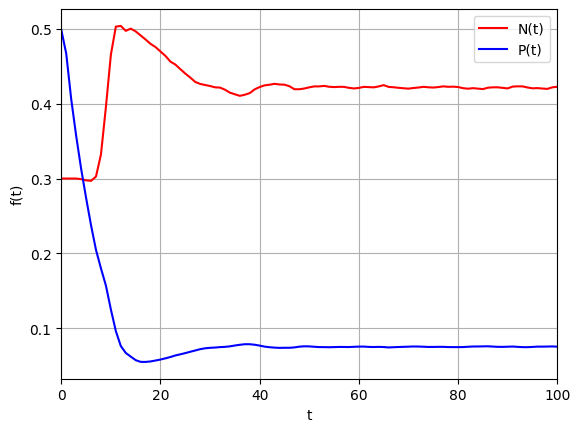

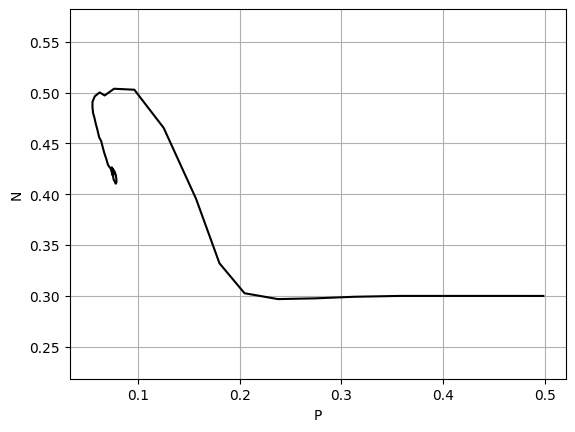

0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функция раскидывания организмов по клеткам
def RandN(Nn, N):
    M = len(N)
    while Nn >= 0:
        i = np.random.randint(M)
        j = np.random.randint(M)
        if N[i, j] == 0:
            N[i, j] = 1
            Nn = Nn - 1
    return N

# Функция определения свободной клетки с наибольшей энергией
def GetClearCell(i, j, N, P):
    M = len(N)
    iN = i
    jN = j
    Pm = 0
    if i > 0 and j > 0 and i < M - 1 and j < M - 1:
        for a in range(-1, 2):
            for b in range(-1, 2):
                if N[i + a, j + b] == 0:
                    if P[i + a, j + b] > Pm:
                        iN = i + a
                        jN = j + b
                        Pm = P[iN, jN]
    return [iN, jN]

# Основная функция
def main():

    # Параметры модели
    M = 256  # размер поля
    pMax = 10  # максимальное значение питательности раствора
    rp = 1  # скорость роста питательности
    L = 15  # время жизни в тактах
    L3 = 3  # возраст зрелости организма
    dpN = 5  # уровень поедаемой клеткой энергии
    pN = 35  # максимальное количество энергии организма
    deN = 2  # затраты энергии организмом
    drN = 3  # затраты энергии при делении
    No = 30  # начальное число особей в %

    # Вычисление количества организмов
    n = int(M * M * No / 100)

    # Создание поля энергии
    P = rp * np.random.randint(0, int(pMax / float(rp)) + 1, size=(M, M))

    # Создание поля организмов
    N = RandN(n, np.zeros([M, M]))

    # Содание поля энергии организмов
    PN = dpN * N

    # Создание поля возраста организмов
    LN = np.zeros([M, M])

    # Количество тактов
    nt = 101

    # Массивы численности одноклеточных и степени питательности раствора
    Nt = np.zeros(nt)
    Pt = np.zeros(nt)

    # Начальные значения
    Nt[0] = n / float(M * M)
    Pt[0] = np.sum(np.sum(P)) / float(M * M * pMax)

    # Массив времени (тактов)
    t = np.linspace(0, nt - 1, nt)

    # Моделирование клеточного автомата
    for k in range(1, nt):
        for i in range(M):
            for j in range(M):

                # Прирост питательности клетки
                if P[i, j] < pMax:
                    P[i, j] = P[i, j] + rp
                    if P[i, j] > pMax:
                        P[i, j] = pMax
        for i in range(M):
            for j in range(M):
                if N[i, j] == 1:

                    # Питание организма
                    if PN[i, j] < pN and P[i, j] != 0:
                        if P[i, j] - dpN >= 0:
                            PN[i, j] = PN[i, j] + dpN
                            P[i, j] = P[i, j] - dpN
                        else:
                            PN[i, j] = PN[i, j] + P[i, j]
                            P[i, j] = 0

                    # Затраты организма
                    if PN[i, j] - deN >= 0:
                        PN[i, j] = PN[i, j] - deN
                    else:
                        PN[i, j] = 0

                    # Старение и смерть организма
                    LN[i, j] = LN[i, j] + 1
                    if LN[i, j] == L or PN[i, j] == 0:
                        N[i, j] = 0
                        LN[i, j] = 0
                        PN[i, j] = 0

        # Перемещение организма
        for i in range(M):
            for j in range(M):
                if N[i, j] == 1:
                    [iN, jN] = GetClearCell(i, j, N, P)
                    if (P[i,j]<P[iN,jN]):
                        N[iN, jN] = 1
                        N[i, j] = 0
                        PN[iN, jN] = PN[i, j]
                        PN[i, j] = 0
        # Рождение организма
        Nk = np.zeros([M, M])
        for i in range(M):
            for j in range(M):
                if N[i, j] == 1:
                    if LN[i, j] >= L3 and PN[i, j] >= drN:
                        PN[i, j] = PN[i, j] - drN
                        [iN, jN] = GetClearCell(i, j, N, P)
                        if iN != i and jN != j:
                            Nk[iN, jN] = 1
                            PN[iN, jN] = PN[i, j]
                            LN[iN, jN] = LN[i, j]
                            LN[i, j] = 0
                            PN[i, j] = drN
        N = N + Nk

        # Вычисление численности одноклеточных и степени питательности раствора
        Nt[k] = np.sum(np.sum(N)) / float(M * M)
        Pt[k] = np.sum(np.sum(P)) / float(M * M * pMax)
        print(f"step {k} of {nt-1}")

    # Построение графиков N(t) и P(t)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, Nt, "-r")
    ax.plot(t, Pt, "-b")
    ax.grid()
    ax.set_xlabel("t")
    ax.set_ylabel("f(t)")
    ax.set_xlim([np.min(t), np.max(t)])
    ax.legend(["N(t)", "P(t)"])
    plt.show()

    # Построение фазовой диаграммы
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Pt, Nt, "-k")
    ax.grid()
    ax.axis("equal")
    ax.set_xlabel("P")
    ax.set_ylabel("N")
    plt.show()

    return 0

main()
